In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [20]:
from langdetect import detect, DetectorFactory
import pandas as pd

# Load and preprocess data
text_file = r"Detail_99_CleanData_0625.csv"
df = pd.read_csv(text_file)
df = df[["GPTs_ID", "GPTs_Name", "Description"]]

# Function to detect primary language of a sentence
def detect_primary_language(sentence):
    try:
        # Initialize DetectorFactory to increase reliability
        DetectorFactory.seed = 0
        # Skip empty or very short texts
        if len(sentence.strip()) < 3:  # Adjust the threshold as needed
            return None
        # Detect language of the sentence
        lang = detect(sentence)
        return lang
    except Exception as e:
        print(f"Error detecting language: {sentence}")
        return None

# Create a new column to store primary language
df['Primary_Language'] = None

# Iterate over each row and apply the language detection function
for index, row in df.iterrows():
    if pd.notna(row['Description']):
        df.at[index, 'Primary_Language'] = detect_primary_language(row['Description'])

# Display the DataFrame with primary language identified for each sentence
print(df[['Description', 'Primary_Language']])


Error detecting language: 🔷#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐂𝐡𝐞𝐦𝐢𝐬𝐭𝐫𝐲 𝐓𝐮𝐭𝐨𝐫🔷
Error detecting language: 🔷#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐓𝐚𝐱 𝐀𝐬𝐬𝐢𝐬𝐭𝐚𝐧𝐭!🔷
Error detecting language: 🔷#𝟏 𝐒𝐩𝐞𝐜𝐢𝐚𝐥𝐢𝐳𝐞𝐝 𝐄𝐜𝐨𝐧𝐨𝐦𝐢𝐜𝐬 𝐓𝐮𝐭𝐨𝐫🔷
Error detecting language: 🔷#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐃𝐢𝐞𝐭 𝐇𝐞𝐥𝐩𝐞𝐫!🔷
Error detecting language: 🔷#𝟏 𝐒𝐩𝐞𝐜𝐢𝐚𝐥𝐢𝐳𝐞𝐝 𝐁𝐢𝐛𝐥𝐞 𝐓𝐮𝐭𝐨𝐫🔷
Error detecting language: 🔷#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐆𝐲𝐦 𝐚𝐧𝐝 𝐖𝐨𝐫𝐤𝐨𝐮𝐭 𝐀𝐬𝐬𝐢𝐬𝐭𝐚𝐧𝐭🔷
Error detecting language: 🔷#𝟏 𝐌𝐚𝐢𝐥 𝐂𝐫𝐞𝐚𝐭𝐢𝐨𝐧 𝐀𝐬𝐬𝐢𝐬𝐭𝐚𝐧𝐭🔷
Error detecting language: 🔷#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐏𝐡𝐲𝐬𝐢𝐜𝐬 𝐀𝐬𝐬𝐢𝐬𝐭𝐚𝐧𝐭🔷
Error detecting language: 🔴𝐂𝐡𝐚𝐫𝐦 𝐖𝐨𝐫𝐝𝐬, 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝🔴
Error detecting language: 🔷#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐆𝐞𝐨𝐠𝐫𝐚𝐩𝐡𝐲 𝐓𝐮𝐭𝐨𝐫🔷
Error detecting language: 🔷#𝟏 𝐒𝐩𝐞𝐜𝐢𝐚𝐥𝐢𝐳𝐞𝐝 𝐀𝐧𝐚𝐭𝐨𝐦𝐲 𝐓𝐮𝐭𝐨𝐫🔷
Error detecting language: 🔴#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐃𝐚𝐭𝐢𝐧𝐠 𝐆𝐮𝐢𝐝𝐚𝐧𝐜𝐞 𝐚𝐧𝐝 𝐒𝐮𝐩𝐩𝐨𝐫𝐭🔴
Error detecting language: 🔴#𝟏 𝐏𝐞𝐫𝐬𝐨𝐧𝐚𝐥𝐢𝐳𝐞𝐝 𝐄𝐱𝐜𝐞𝐥 𝐀𝐬𝐬𝐢𝐬𝐭𝐚𝐧𝐭🔴
Error detecting language: --13307316503@163.com
                                             Description Primary_Language
0      A GPT specialized in generating and refining i...               en
1      Ask the research,

Silhouette Score: 0.0030834496415764233


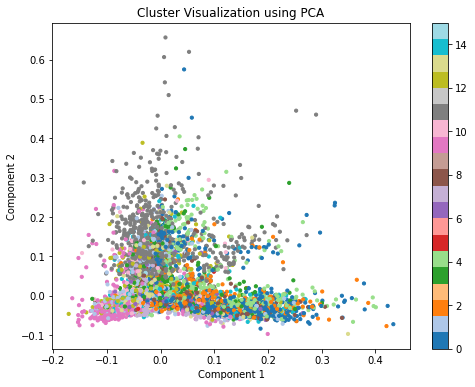

In [2]:
# Load clustered data from CSV
result_folder = r"E:\GPT\Cluster_3"
output_file = result_folder + r'\Clustered_Text_Data.csv'
df = pd.read_csv(output_file)

# Extract text data and cluster labels
texts = df['Description'].tolist()
labels = df['Cluster'].tolist()

# Visualize clustering using PCA or t-SNE
def visualize_clusters(embeddings, labels, method='PCA'):
    if method == 'PCA':
        reducer = PCA(n_components=2, random_state=42)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Unsupported dimensionality reduction method. Choose 'PCA' or 't-SNE'.")
    
    embeddings_2d = reducer.fit_transform(embeddings)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab20', s=10)
    plt.title(f'Cluster Visualization using {method}')
    plt.colorbar()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Compute TF-IDF features for cluster profiles
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Assess clustering quality using silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
visualize_clusters(X.toarray(), labels, method='PCA')


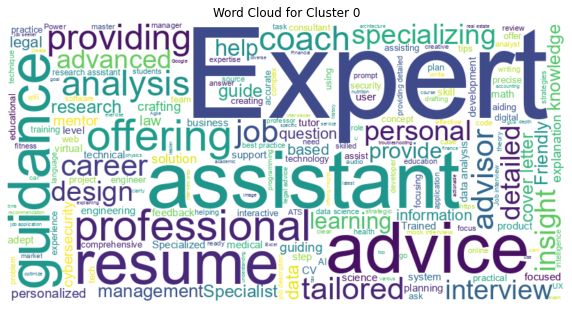

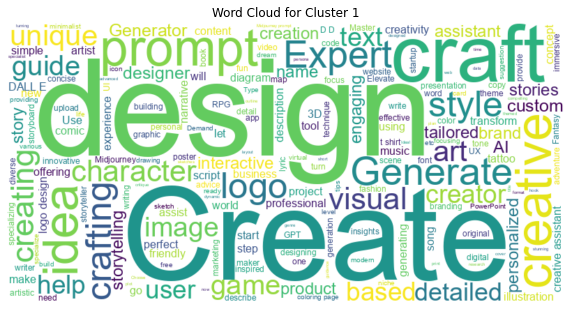

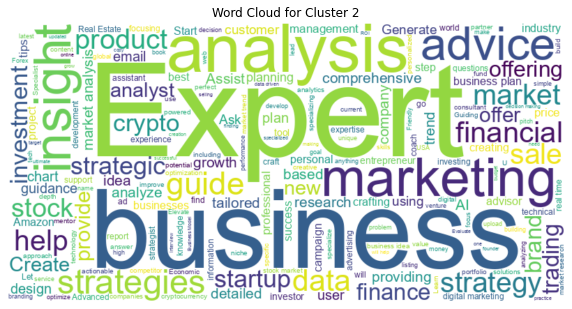

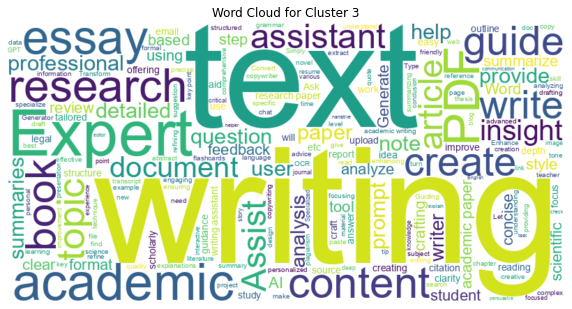

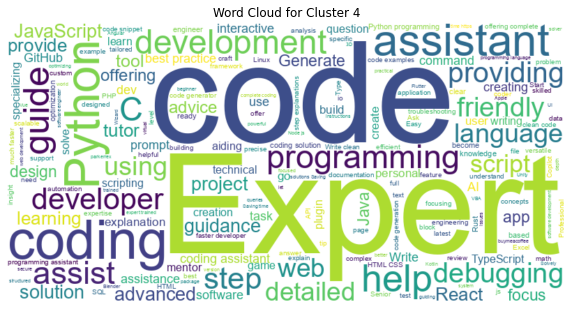

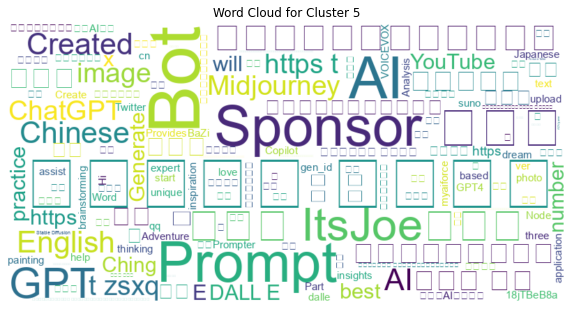

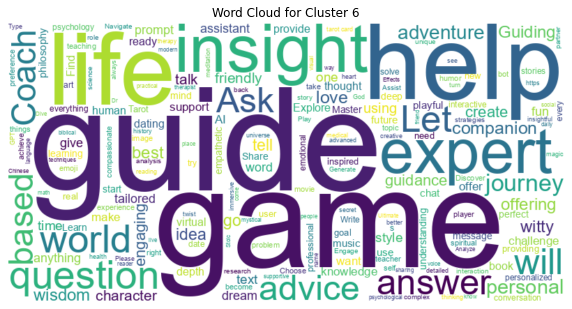

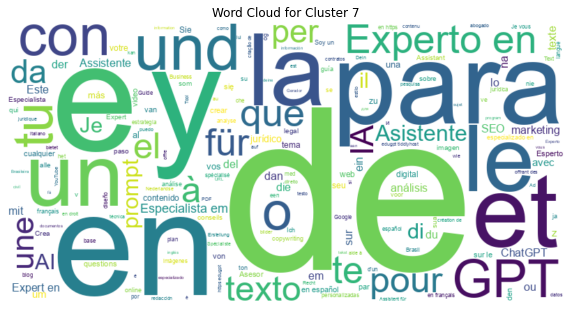

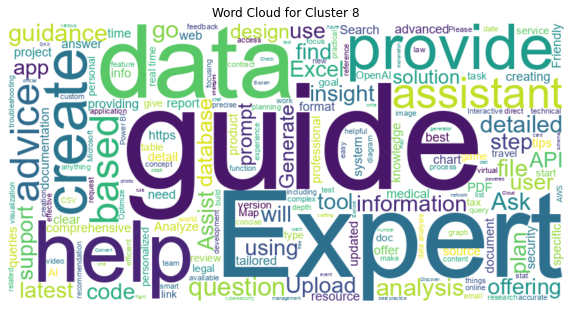

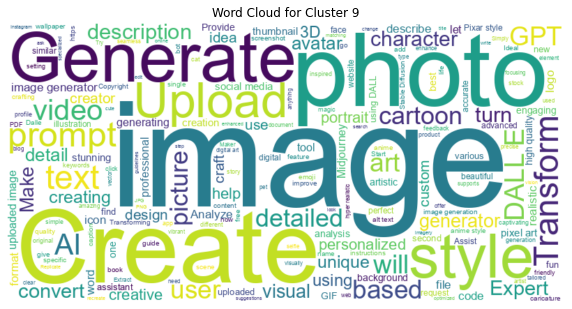

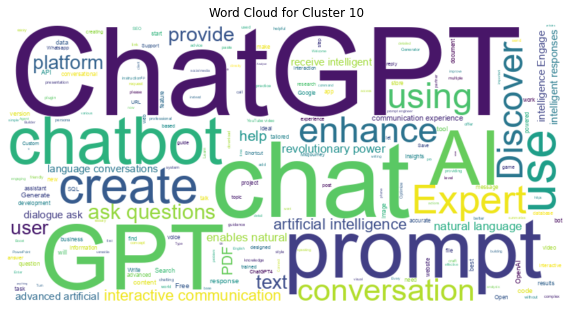

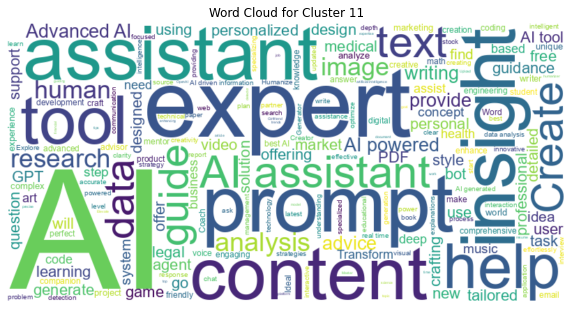

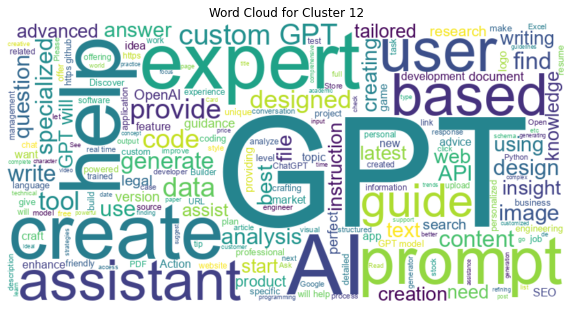

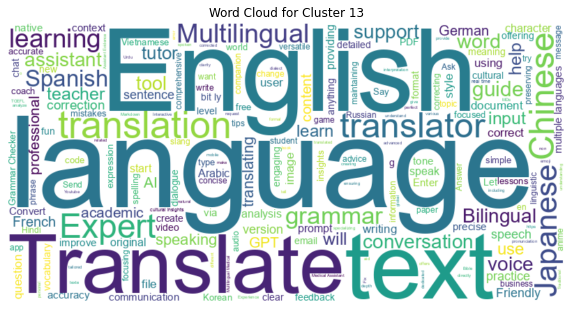

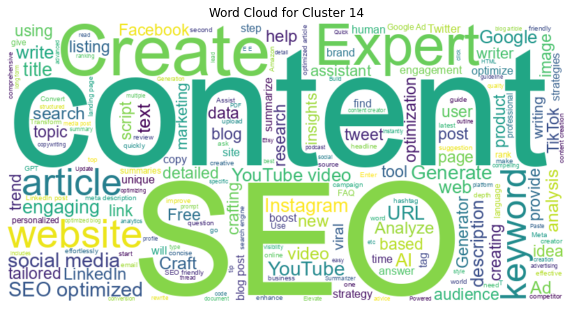

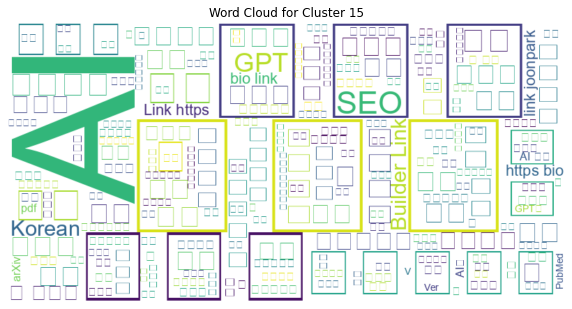

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordclouds(texts, labels):
    unique_labels = set(labels)
    for label in unique_labels:
        cluster_texts = [texts[i] for i, l in enumerate(labels) if l == label]
        cluster_text = ' '.join(cluster_texts)
        
        # Use default font provided by matplotlib
        wordcloud = WordCloud(font_path='arial.ttf', background_color='white', width=800, height=400).generate(cluster_text)
        # wordcloud = WordCloud(background_color='white', width=800, height=400, font_path='path/to/your/font.ttf').generate(cluster_text)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Cluster {label}')
        plt.axis('off')
        plt.show()

# Example usage with default font
generate_wordclouds(texts, labels)
